In [1]:
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx
import os
from dotenv import load_dotenv
load_dotenv()
number_of_blocks = 300

df = pd.read_pickle(os.environ['SAVE_DF_PATH']+str(number_of_blocks))

sender = df['Sender Address'].tolist()
receiver = df['Receiver Address'].tolist()
total = sender + receiver

# new_df = df.groupby(['Receiver Address'])['Sender Address'].count().reset_index(
#   name='Count').sort_values(['Count'], ascending=False)




In [2]:
df

,Sender Address,Receiver Address,Transaction Type,Transaction note,Transaction block,Transaction Amount,App or Asset Id
0,ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH5...,BRPAMLXQS6LCRQMTDRFQ56WZXZCF7OBE5QYNSVVFITSKVZ...,axfer,"b'{""sensorId"": ""PW:AE_020410"", ""streams"": 62, ...",20000000,NA,27165954
1,ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH5...,RHAUUTVIJSYBC3BDGXFOAADCY7GNI2PVYS3YGJWJ5IHJWK...,axfer,b'\x81\xa6string\xda\x02\x08cVBYz2bAADzZ/mODXd...,20000000,NA,27165954
2,ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH5...,ZLNXTK65HNKXO7CDO7JHYZAXI5EW22GJ4FI2FAZINYEMUX...,axfer,"b'{""sensorId"": ""PW:AE_020418"", ""streams"": 63, ...",20000000,NA,27165954
3,ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH5...,SNTMKUCKKPTQGJ7YFNUORQWJME42E7EQGR63QBUBUO3SNY...,axfer,b'\x81\xa6string\xda\x02\x10KkvGUml5Usmt91EIYc...,20000000,NA,27165954
4,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,axfer,"b'{""i"":""102e2e09393bfb6095ca683bcc58ba5b"",""w"":...",20000000,1,127746157
...,...,...,...,...,...,...,...
27430,WHBAJVUFHCGYB6ZVVBTVLS3D65ZOYBMPTIBHUHLVEPG2ZN...,WHBAJVUFHCGYB6ZVVBTVLS3D65ZOYBMPTIBHUHLVEPG2ZN...,pay,"b'{""WHBAJVUFHCGYB6ZVVBTVLS3D65ZOYBMPTIBHUHLVEP...",20000299,NA,NA
27431,ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH5...,VOG3R3X5WTIM3YHFSRVG5U5B6L5XH5T3KOG5IBVSHSU73T...,axfer,"b'{""sensorId"": ""PW:AE_009746"", ""streams"": 62, ...",20000299,NA,27165954
27432,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,axfer,"b'{""i"":""1f19c9438acf60c80f28322f1dce3688"",""w"":...",20000299,1,127746157
27433,ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH5...,XXO3IUCPAB4V2MXSGPP6U6HYMYLYPXUWCUEWFSDYZVE6S5...,axfer,"b'{""sensorId"": ""PW:AE_009760"", ""streams"": 62, ...",20000299,NA,27165954


<Figure size 2000x1000 with 0 Axes>

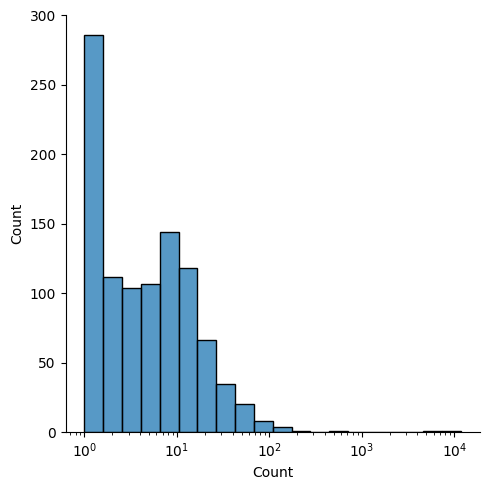

<AxesSubplot: xlabel='Sender Address', ylabel='Count'>

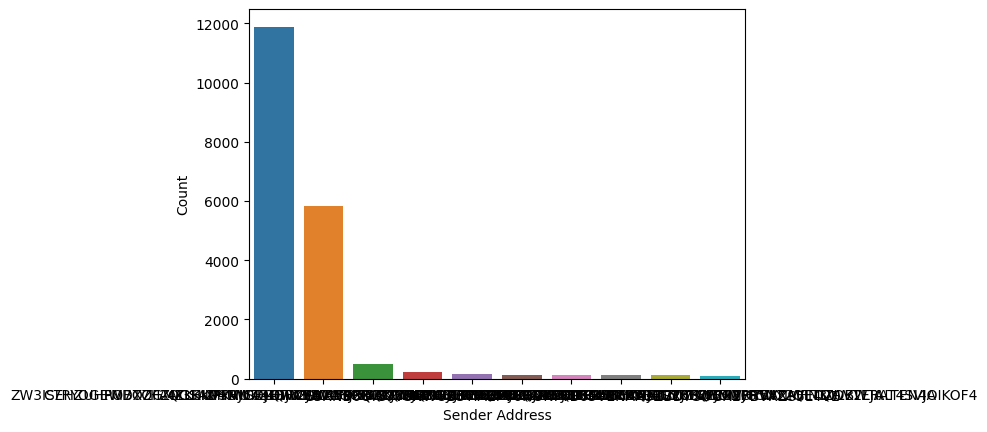

In [3]:
#Grafico de frecuencia para senders

senders = df[['Sender Address', 'Transaction Type']]
senders

new_df = senders.groupby(['Sender Address'])['Sender Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
#new_df

plt.figure(figsize=(20,10))
sb.displot(new_df, x = 'Count', log_scale=True)
plt.show()

f_new_df = new_df[:10]
f_new_df

sb.barplot(data = f_new_df, x='Sender Address', y = 'Count')





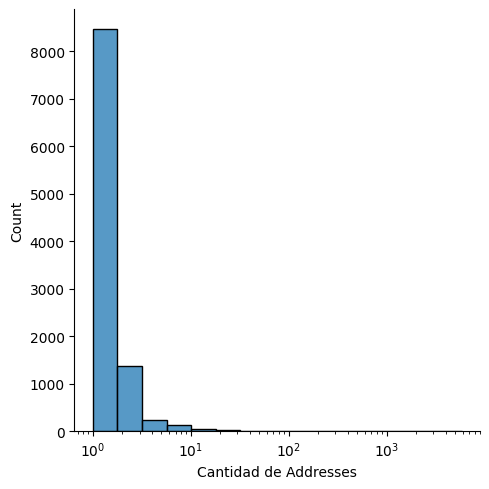

<AxesSubplot: xlabel='Receiver Address', ylabel='Count'>

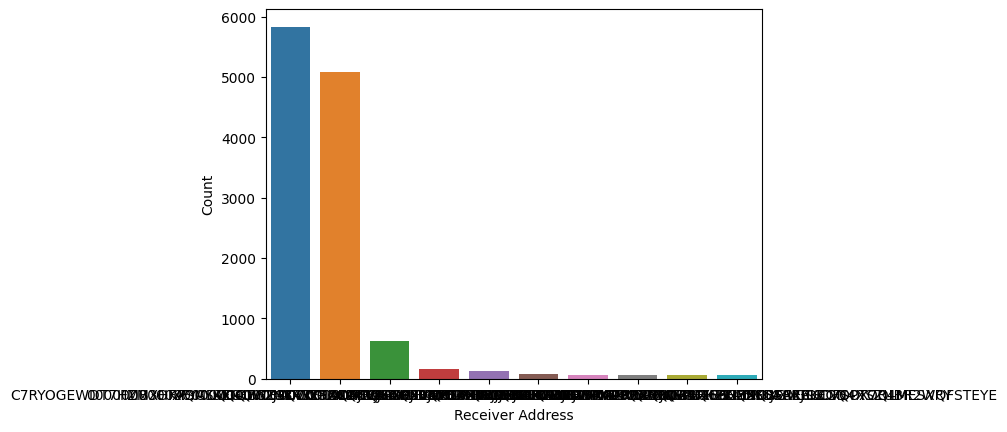

In [4]:
#Grafico de frecuencia para receivers


receivers = df[['Receiver Address', 'Transaction Type']]
receivers

new_df2 = receivers.groupby(['Receiver Address'])['Receiver Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
new_df2

sb.displot(new_df2, x = 'Count', log_scale = True)
plt.xlabel('Cantidad de Addresses')
#plt.ylim(0, 600)
plt.show()

f_new_df2 = new_df2[:10]
f_new_df2
sb.barplot(data = f_new_df2, x='Receiver Address', y = 'Count')

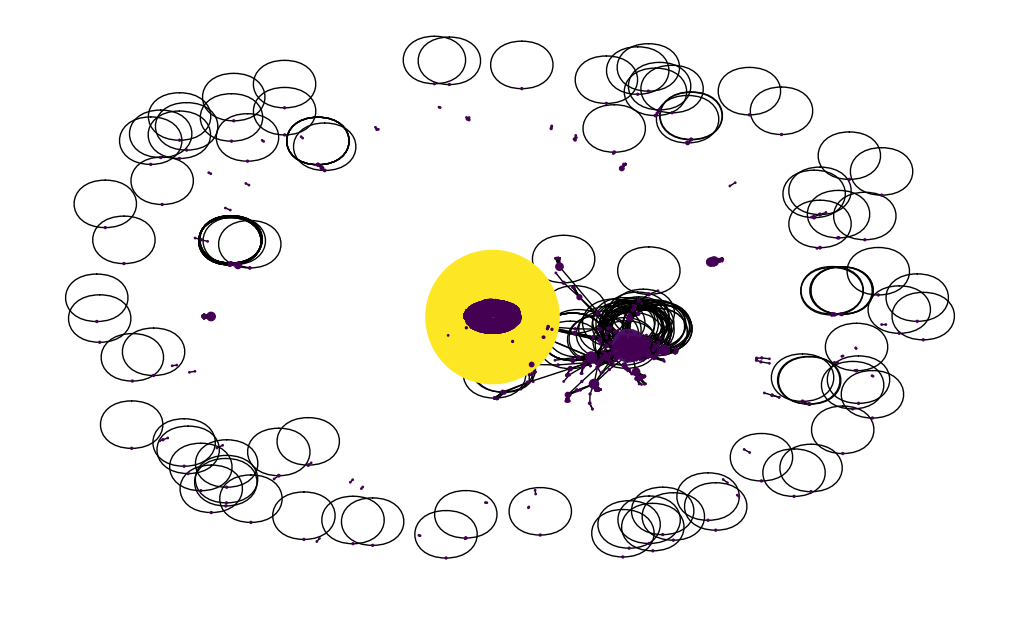

In [5]:
N = nx.DiGraph()
G = nx.from_pandas_edgelist(df,'Sender Address', 'Receiver Address')

plt.figure(figsize=(10, 6))
#nx.draw_networkx(G, with_labels=False)


node_color = [float(G.degree(v)) for v in G]
pos=nx.spring_layout(G)
nx.draw(
    G,
    node_size = [float(G.degree(v)) for v in G],
    node_color=node_color,
    with_labels=False,
)
plt.show()




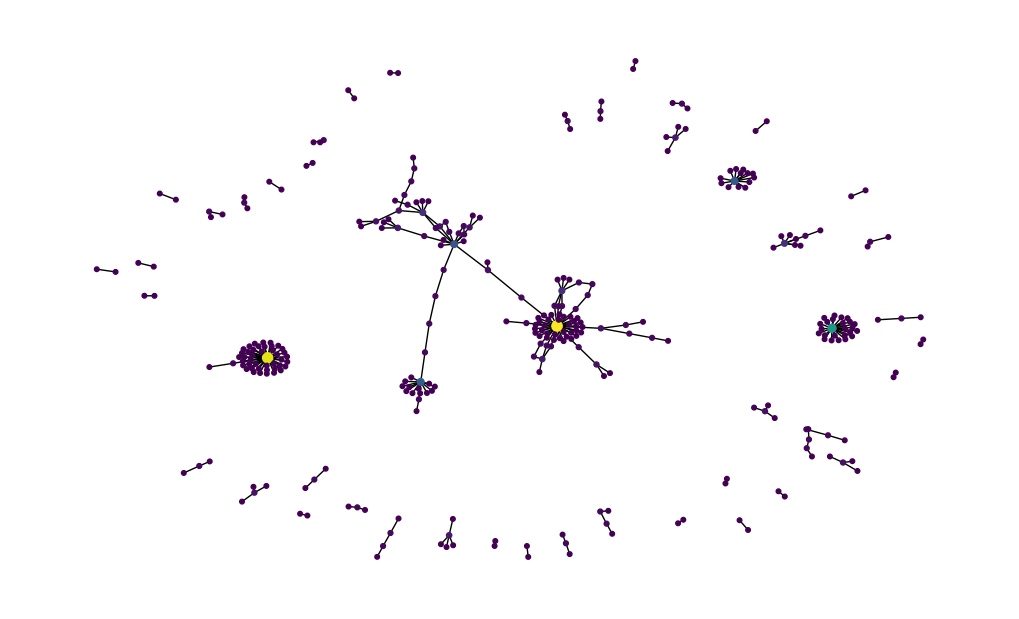

In [6]:
filtered = df[df['Sender Address'] != 'ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH52HGLSO67W754']
filtered2 = filtered[filtered['Receiver Address'] != '0000000000000000000000000000000000000000000000000000000000']
filtered = filtered2
filtered = filtered[filtered['Sender Address'] != filtered['Receiver Address']]
# filtro = filtro[filtro['Sender Address'] != 'ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH52HGLSO67W754']
# filtro = filtro[filtro['Receiver Address'] != '0000000000000000000000000000000000000000000000000000000000']
# filtro = filtro[filtro['Sender Address'] != 'FMBXOFAQCSAD4UWU4Q7IX5AV4FRV6AKURJQYGXLW3CTPTQ7XBX6MALMSPY']
# filtro = filtro[filtro['Receiver Address'] != 'FMBXOFAQCSAD4UWU4Q7IX5AV4FRV6AKURJQYGXLW3CTPTQ7XBX6MALMSPY']
# filtro = filtro[filtro['Sender Address'] != 'OCRYIWGJW23U7XHGB6TLNFGIA4XZDOXEH7ZJRGKHZ725P33S3IFWLCRABA']
# filtro = filtro[filtro['Receiver Address'] != 'QJE4QSU4YO7HKIIY6BWDFD3EWRAZP2AUROARFHFZGMUBFREPUCVQPTOQLM']

H = nx.from_pandas_edgelist(filtered,'Sender Address', 'Receiver Address')

plt.figure(figsize=(10, 6))
node_color = [float(H.degree(v)) for v in H]

nx.draw(
    H,
    node_size = [float(H.degree(v)) +10 for v in H],
    node_color=node_color,
    with_labels=False,
)

In [7]:
nx.write_gexf(H, 'prueba.gexf')